In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('greenbuildings.csv')

In [5]:
df.head()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78


In [15]:
df.columns

Index(['CS_PropertyID', 'cluster', 'size', 'empl_gr', 'Rent', 'leasing_rate',
       'stories', 'age', 'renovated', 'class_a', 'class_b', 'LEED',
       'Energystar', 'green_rating', 'net', 'amenities', 'cd_total_07',
       'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs',
       'Electricity_Costs', 'cluster_rent'],
      dtype='object')

## Let's look at the argument of the Excel guru, one piece at a time
### First - Outlier Treatment for Occupancy

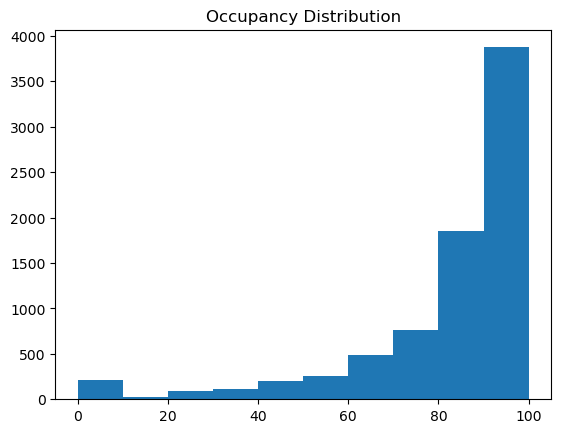

In [13]:
plt.hist(df['leasing_rate'])
plt.title('Occupancy Distribution')
plt.show()

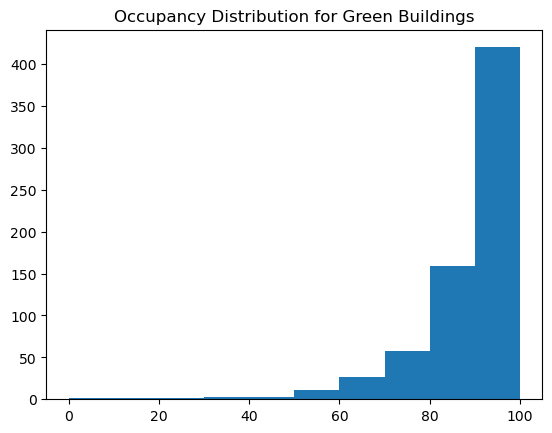

In [138]:
plt.hist(df['leasing_rate'][df['green_rating']==1])
plt.title('Occupancy Distribution for Green Buildings')
plt.show()

### Looking at the previous plots, it does seem reasonable to not consider buildings with occupancy less than 10%

In [24]:
df_out_treated = df[df['leasing_rate']>0.10]

### Second - Rent and Green building rent premium distrbution

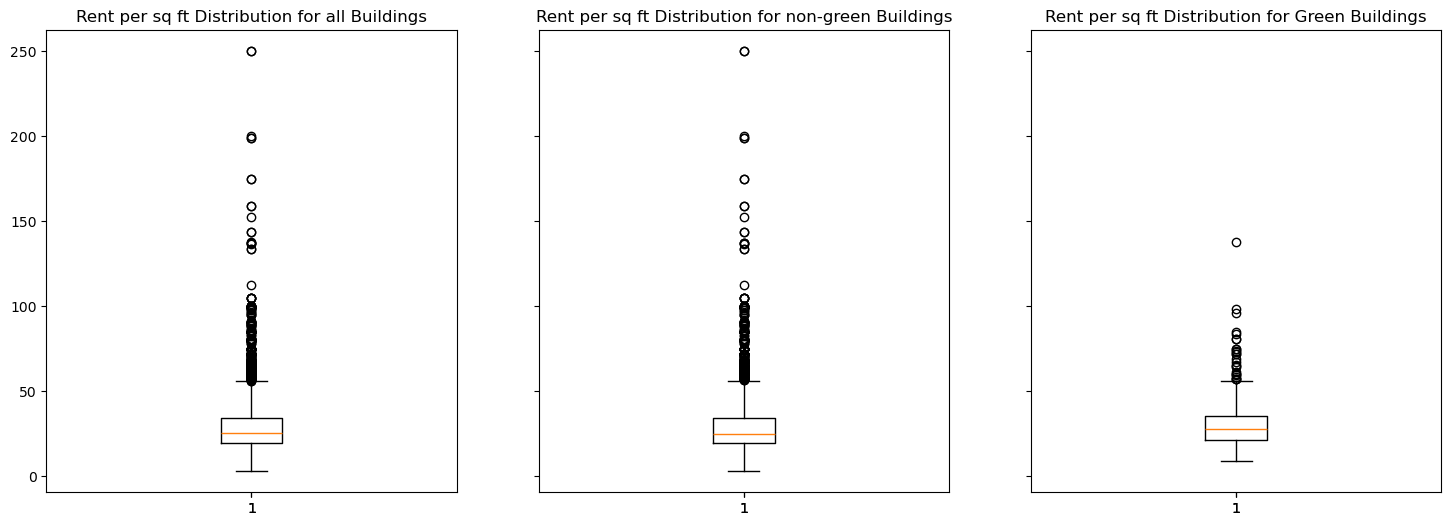

In [140]:
# First, create a blank figure and "axis" objects
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,
                                ncols=3,
                                sharex=True,  # important for being able to compare the image axis
                                sharey=True, # important for being able to compare the image axis
                                figsize=(18, 6))

# Each "axis" object corresponds to one subplot
# Fill in the subplots.
ax1.boxplot(df_out_treated['Rent'])
ax1.set_title('Rent per sq ft Distribution for all Buildings')

ax2.boxplot(df_out_treated[df_out_treated['green_rating']==0]['Rent'])
ax2.set_title('Rent per sq ft Distribution for non-green Buildings')

ax3.boxplot(df_out_treated[df_out_treated['green_rating']==1]['Rent'])
ax3.set_title('Rent per sq ft Distribution for Green Buildings')

plt.show()

### Rent does have many outliers, how about the green rent premiums?

##### To undestand how much rent premium a green building can claim we will look exclusively at the difference between a green building's rent and it's cluster average rent. That is a more appropriate metric to understand localized premiums, rather than taking absolute difference between average green and non green building rents

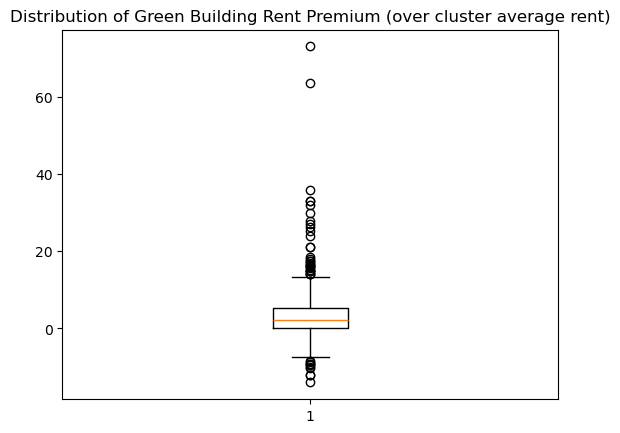

In [144]:
plt.boxplot(df_out_treated[df_out_treated['green_rating']==1]['Rent'] - df_out_treated[df_out_treated['green_rating']==1]['cluster_rent'])
plt.title('Distribution of Green Building Rent Premium (over cluster average rent)')
plt.show()

### All this is fine, but does our particular building at East Cesar Chavez have any reason to command a higher green rent premium?
### Let's see how this green rent premium changes as buildings get taller

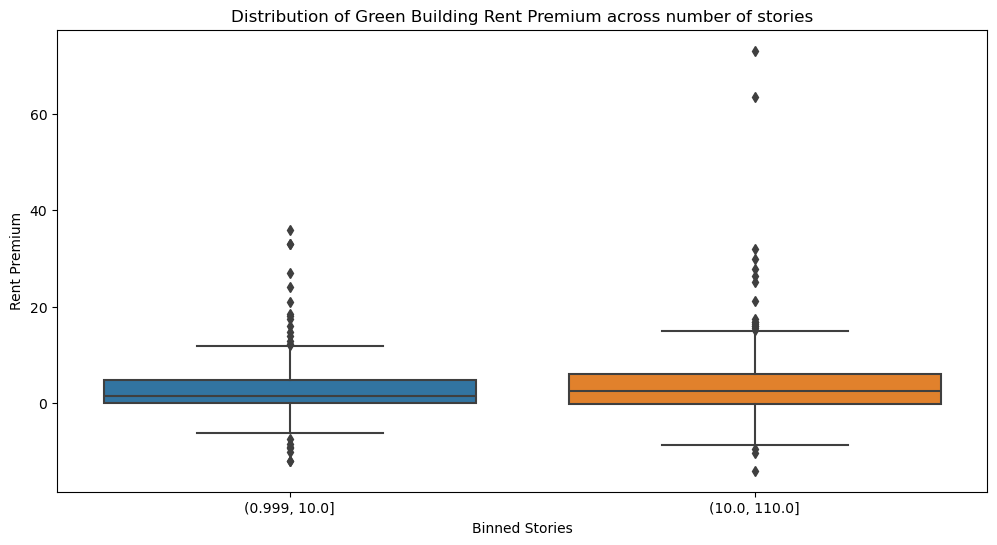

In [214]:
import seaborn as sns
df_out_treated['binned_stories'] = pd.qcut(df_out_treated['stories'], 2)

# Calculate rent premium
df_out_treated['rent_premium'] = df_out_treated['Rent'] - df_out_treated['cluster_rent']

# Filter the data for 'net' equal to 1
df_filtered = df_out_treated[df_out_treated['green_rating'] == 1]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='binned_stories', y='rent_premium', data=df_filtered)
plt.title('Distribution of Green Building Rent Premium across number of stories')
plt.xlabel('Binned Stories')
plt.ylabel('Rent Premium')
plt.show()


### Looks like buildings with more than 10 stories, command a higher green premium over others. Good thing, we are planning a 15 storey building

### How about square footage? We know we are building a 250k sq footage building


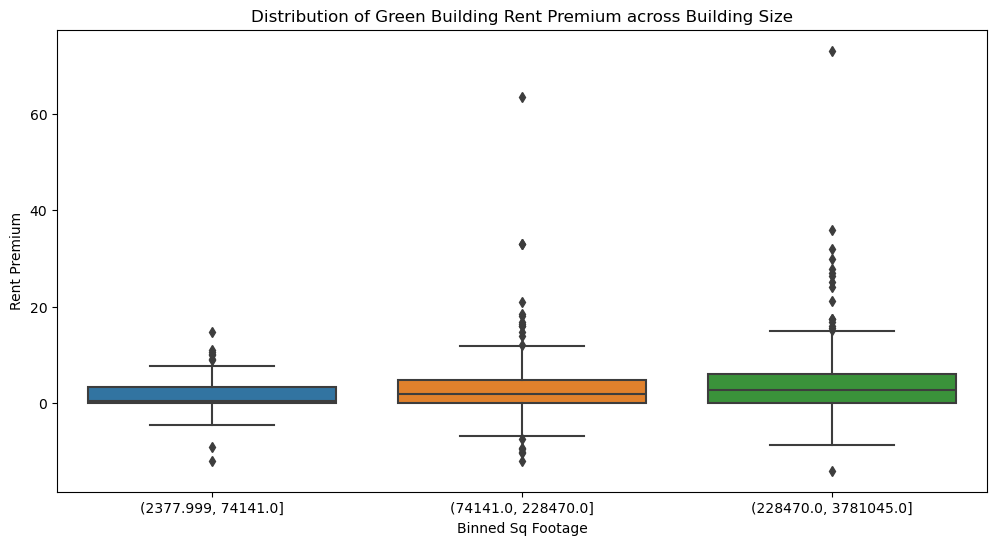

In [201]:
import seaborn as sns
df_out_treated['binned_footage'] = pd.qcut(df_out_treated['size'], 3)

# Calculate rent premium
df_out_treated['rent_premium'] = df_out_treated['Rent'] - df_out_treated['cluster_rent']

# Filter the data for 'net' equal to 1
df_filtered = df_out_treated[df_out_treated['green_rating'] == 1]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='binned_footage', y='rent_premium', data=df_filtered)
plt.title('Distribution of Green Building Rent Premium across Building Size')
plt.xlabel('Binned Sq Footage')
plt.ylabel('Rent Premium')
plt.show()


### So our building falls in the right most category, which does have a higher rent premium in comparison to other categories


### Let's look at the same trend against building age.

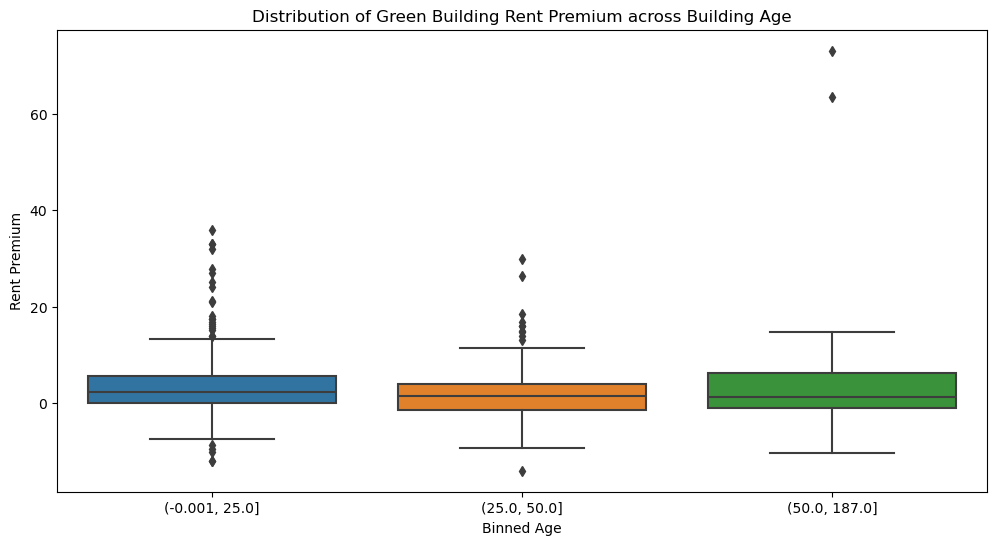

In [208]:
import seaborn as sns
df_out_treated['binned_age'] = pd.qcut(df_out_treated['age'], 3)

# Calculate rent premium
df_out_treated['rent_premium'] = df_out_treated['Rent'] - df_out_treated['cluster_rent']

# Filter the data for 'net' equal to 1
df_filtered = df_out_treated[df_out_treated['green_rating'] == 1]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='binned_age', y='rent_premium', data=df_filtered)
plt.title('Distribution of Green Building Rent Premium across Building Age')
plt.xlabel('Binned Age')
plt.ylabel('Rent Premium')
plt.show()


### It looks like building younger than 25 years command a slightly higher green rent premium

### Let's collect our learnings and find a more customized rent premium for our building at East Chavez

In [217]:

# df_out_treated['custom_age_cat'] = np.where(df_out_treated['age']<=25,'Less than 26 years old','Atleast 26 years old')
df_out_treated[df_out_treated['green_rating']==1].groupby(['binned_stories','binned_footage','binned_age']).agg({'rent_premium':['mean','median']})

rent_premium         
                                                            mean   median
binned_stories binned_footage        binned_age                          
(0.999, 10.0]  (2377.999, 74141.0]   (-0.001, 25.0]     1.633359   0.4050
                                     (25.0, 50.0]       1.644615   0.5250
                                     (50.0, 187.0]     -0.756667  -0.6275
               (74141.0, 228470.0]   (-0.001, 25.0]     2.819326   2.2700
                                     (25.0, 50.0]       2.091552   0.4100
                                     (50.0, 187.0]      0.191429   0.0000
               (228470.0, 3781045.0] (-0.001, 25.0]     5.010714   3.3750
                                     (25.0, 50.0]       1.177500   1.2500
                                     (50.0, 187.0]           NaN      NaN
(10.0, 110.0]  (2377.999, 74141.0]   (-0.001, 25.0]          NaN      NaN
                                     (25.0, 50.0]            NaN      NaN
                                     (50.0, 187.0]     14.825000  14.8250
               (74141.0, 228470.0]   (-0.001, 25.0]     2.016212   1.5000
                                     (25.0, 50.0]       2.589583   2.6500
                                     (50.0, 187.0]     19.036667   4.0000
               (228470.0, 3781045.0] (-0.001, 25.0]     3.734865   2.8600
                                     (25.0, 50.0]       2.443947   1.7700
                                     (50.0, 187.0]      8.935500   2.9000

### It looks like we can claim USD 2.85 premium in rent over cluster average for our building at East Chavez.
### This results in USD 715k (2.86*250k) additional rent per calendar year. This way we will recover additional 5 Mn in certification cost in less than 7 years
### Recommendation would be to go ahead with the project. The conclusion of the stats guru is correct, however, our analysis delves down further into their assumptions